# Graphviz Topology Graph

In this example, we will demonstrate how you can visualize the topology of a power system model using [Graphviz](http://graphviz.org).
This demo uses IPython's [Rich Display feature](https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html) to show the rendered topology graph as a Scalable Vector Graphic (SVG) inline with the IPython interpreter or the Jupyter Notebook.

## Example 1

We start by importing several packages required by DPsim itself.

In [1]:
import dpsim

We define a simple network:

In [3]:
# Nodes
gnd = dpsim.dp.Node.GND()
n1 =  dpsim.dp.Node("n1")
n2 =  dpsim.dp.Node("n2")
n3 =  dpsim.dp.Node("n3")
n4 =  dpsim.dp.Node("n4")

# Components
v1 =  dpsim.dp.ph1.VoltageSource("v_1", [gnd, n1], V_ref=complex(345,0))
r1 =  dpsim.dp.ph1.Resistor("r1", [n1, n2], R=5)
c1 =  dpsim.dp.ph1.Capacitor("c_1", [n2, gnd], C=0.002)
rL1 = dpsim.dp.ph1.Resistor("r_load1", [n2, n4], R=6.4)
l1 =  dpsim.dp.ph1.Inductor("l_1", [n4, n3], L=0.186)
c2 =  dpsim.dp.ph1.Capacitor("c_2", [n3, gnd], C=0.002)
rL2 = dpsim.dp.ph1.Resistor("r_load2", [n3, gnd], R=150)

sys = dpsim.SystemTopology(50, [gnd, n1, n2, n3, n4], [v1, r1, c1, rL1, l1, c2, rL2])

Before we display the graph of this network, we will run a short simulation in order to bring the system into a steady state.
This is useful, as we will be able to inspect the component and node states in the rendered graph.

In [5]:
sim = dpsim.Simulation('IdealVS_PiLine_RLC_1', sys, duration=20, timestep=0.0005)
await sim.simulate()

Finally, we can render the graph of the network topology:

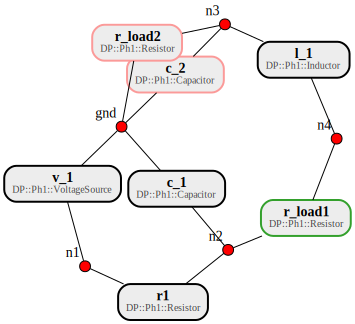

In [6]:
sys

By hovering the mouse pointer over the component nodes a tooltip will appear.
This tooltip lists all attributes of a component including its internal states such as voltage and current.

## Example 2

In the next example, a more complex Common Information model will be visualized.

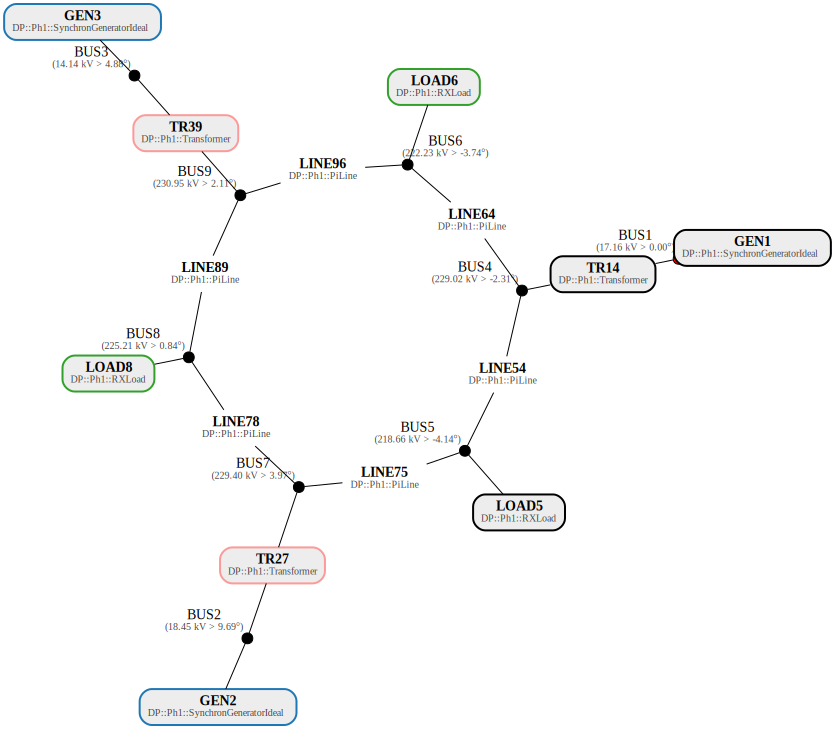

In [7]:
import dpsim
from glob import glob

# Adjust this path to the root of the DPsim repo
path = '../../..'
files = glob(path + '/Examples/CIM/WSCC-09_RX/*.xml')

dpsim.load_cim('WSCC_9bus', files)